#### Devloper Productivity Performance Model
##### By : Shivam Singh
---

#### Objective: 
The object of this project is to understand what really affects a software developer’s performance and how different work and human factors influence task success.

---


In [32]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# Import data visualization libaries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Neccessory Libraries
import warnings
warnings.filterwarnings(action= 'ignore')

In [33]:
df = pd.read_csv(r'C:\ML\Developer-Productivity-Analysis-Model\Data\raw\Ai_Developer.csv')

In [34]:
# 1. How big data is ?
df.shape

(1000, 13)

In [35]:
# 2. How does the data look like ?
df.sample(frac=1) 

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
311,11,352,9,5,0,4.8,93,30,7,100,11.9,11,6
35,9,669,15,15,2,6.0,33,75,5,38,8.9,20,3
538,9,465,11,7,5,7.0,88,30,3,100,11.5,14,6
221,9,527,7,4,1,9.0,91,30,4,100,7.7,28,0
156,1,131,11,7,2,7.7,75,38,0,82,0.6,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,3,259,13,11,2,7.5,33,68,3,41,4.6,11,1
577,1,109,10,7,6,8.6,62,54,0,79,1.9,7,5
166,8,558,9,8,2,6.5,71,40,7,84,18.7,10,3
875,2,164,1,0,2,7.8,35,72,1,43,2.3,4,5


In [36]:
# data type of different cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours_Coding         1000 non-null   int64  
 1   Lines_of_Code        1000 non-null   int64  
 2   Bugs_Found           1000 non-null   int64  
 3   Bugs_Fixed           1000 non-null   int64  
 4   AI_Usage_Hours       1000 non-null   int64  
 5   Sleep_Hours          1000 non-null   float64
 6   Cognitive_Load       1000 non-null   int64  
 7   Task_Success_Rate    1000 non-null   int64  
 8   Coffee_Intake        1000 non-null   int64  
 9   Stress_Level         1000 non-null   int64  
 10  Task_Duration_Hours  1000 non-null   float64
 11  Commits              1000 non-null   int64  
 12  Errors               1000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 101.7 KB


In [37]:
# Is there any missing value
df.isnull().sum()

Hours_Coding           0
Lines_of_Code          0
Bugs_Found             0
Bugs_Fixed             0
AI_Usage_Hours         0
Sleep_Hours            0
Cognitive_Load         0
Task_Success_Rate      0
Coffee_Intake          0
Stress_Level           0
Task_Duration_Hours    0
Commits                0
Errors                 0
dtype: int64

In [38]:
# how does data look like?
from collections import OrderedDict

def stats():
    num_stats = []
    for i in df.columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1 
        LF = Q1 - 1.5*IQR
        UF = Q3 + 1.5*IQR

        outlier_count = len(df[(df[i] < LF) | (df[i] > UF)])
        outlier_percentage = outlier_count / len(df[i]) * 100

        numerical_stats = OrderedDict({
            "Feature " : i ,
            "Min" : df[i].min(),
            "Max" : df[i].max(),
            "Q1" : Q1,
            "Q3" : Q3,
            "IQR" : IQR,
            "LF" : LF,
            "UF" : UF,
            "Mean" : df[i].mean(),
            "Median" : df[i].median(),
            
            "Outlier count" : outlier_count,
            "outlier percentage" : outlier_percentage,
            "standard derivation": df[i].std(),
            "variance" : df[i].var(),
            "skewness" : df[i].skew(),
            "kurtosis" : df[i].kurtosis()
        })
        num_stats.append(numerical_stats)
    numerical_stats_report = pd.DataFrame(num_stats)
    return numerical_stats_report

numerical_stats_report = stats()
numerical_stats_report

,Feature,Min,Max,Q1,Q3,IQR,LF,UF,Mean,Median,Outlier count,outlier percentage,standard derivation,variance,skewness,kurtosis
0,Hours_Coding,1.0,11.0,3.0,9.0,6.0,-6.00,18.00,5.8400,6.00,0,0.0,3.158540,9.976376,0.028137,-1.223939
1,Lines_of_Code,26.0,993.0,209.5,480.5,271.0,-197.00,887.00,356.2340,332.00,2,0.2,188.155350,35402.435680,0.583264,-0.225805
2,Bugs_Found,0.0,19.0,5.0,15.0,10.0,-10.00,30.00,9.8760,10.00,0,0.0,5.796052,33.594218,-0.092492,-1.220069
3,Bugs_Fixed,0.0,19.0,2.0,12.0,10.0,-13.00,27.00,7.1530,7.00,0,0.0,5.468226,29.901492,0.160721,-1.196841
4,AI_Usage_Hours,0.0,6.0,1.0,5.0,4.0,-5.00,11.00,2.9610,3.00,0,0.0,2.021278,4.085565,0.021206,-1.279167
5,Sleep_Hours,4.0,9.0,5.2,7.7,2.5,1.45,11.45,6.4658,6.40,0,0.0,1.439529,2.072243,0.062083,-1.185218
6,Cognitive_Load,20.0,94.0,38.0,76.0,38.0,-19.00,133.00,56.9330,57.00,0,0.0,21.767506,473.824335,0.013710,-1.207301
7,Task_Success_Rate,30.0,100.0,37.0,74.0,37.0,-18.50,129.50,56.5780,55.50,0,0.0,20.814879,433.259175,0.243865,-1.174760
8,Coffee_Intake,0.0,7.0,1.0,5.0,4.0,-5.00,11.00,3.3680,3.00,0,0.0,2.342234,5.486062,0.058356,-1.270601
9,Stress_Level,30.0,100.0,48.0,86.0,38.0,-9.00,143.00,66.4100,66.00,0,0.0,21.865452,478.097998,-0.050396,-1.223387


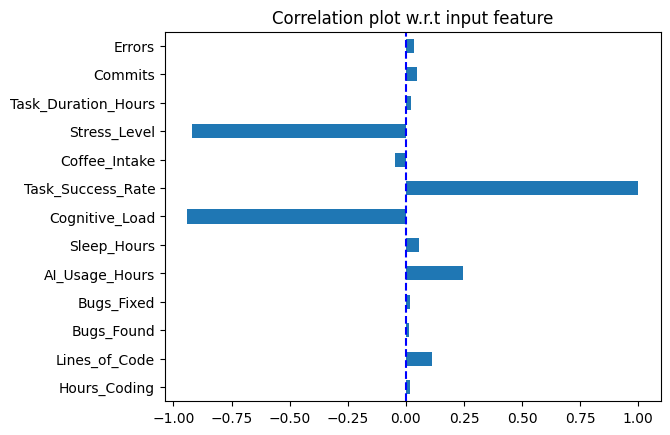

In [39]:
# correlation between cols?

df.corr()["Task_Success_Rate"].plot(kind='barh')
plt.axvline(0,linestyle = '--' ,color = 'blue')
plt.title("Correlation plot w.r.t input feature")
plt.show()

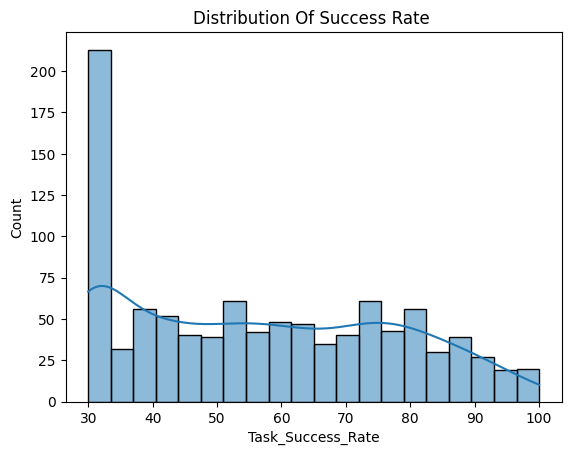

In [40]:
#Distribution of success rate
plt.figure()
sns.histplot(df['Task_Success_Rate'] ,bins= 20 , kde= True)
plt.title("Distribution Of Success Rate ")
plt.show()

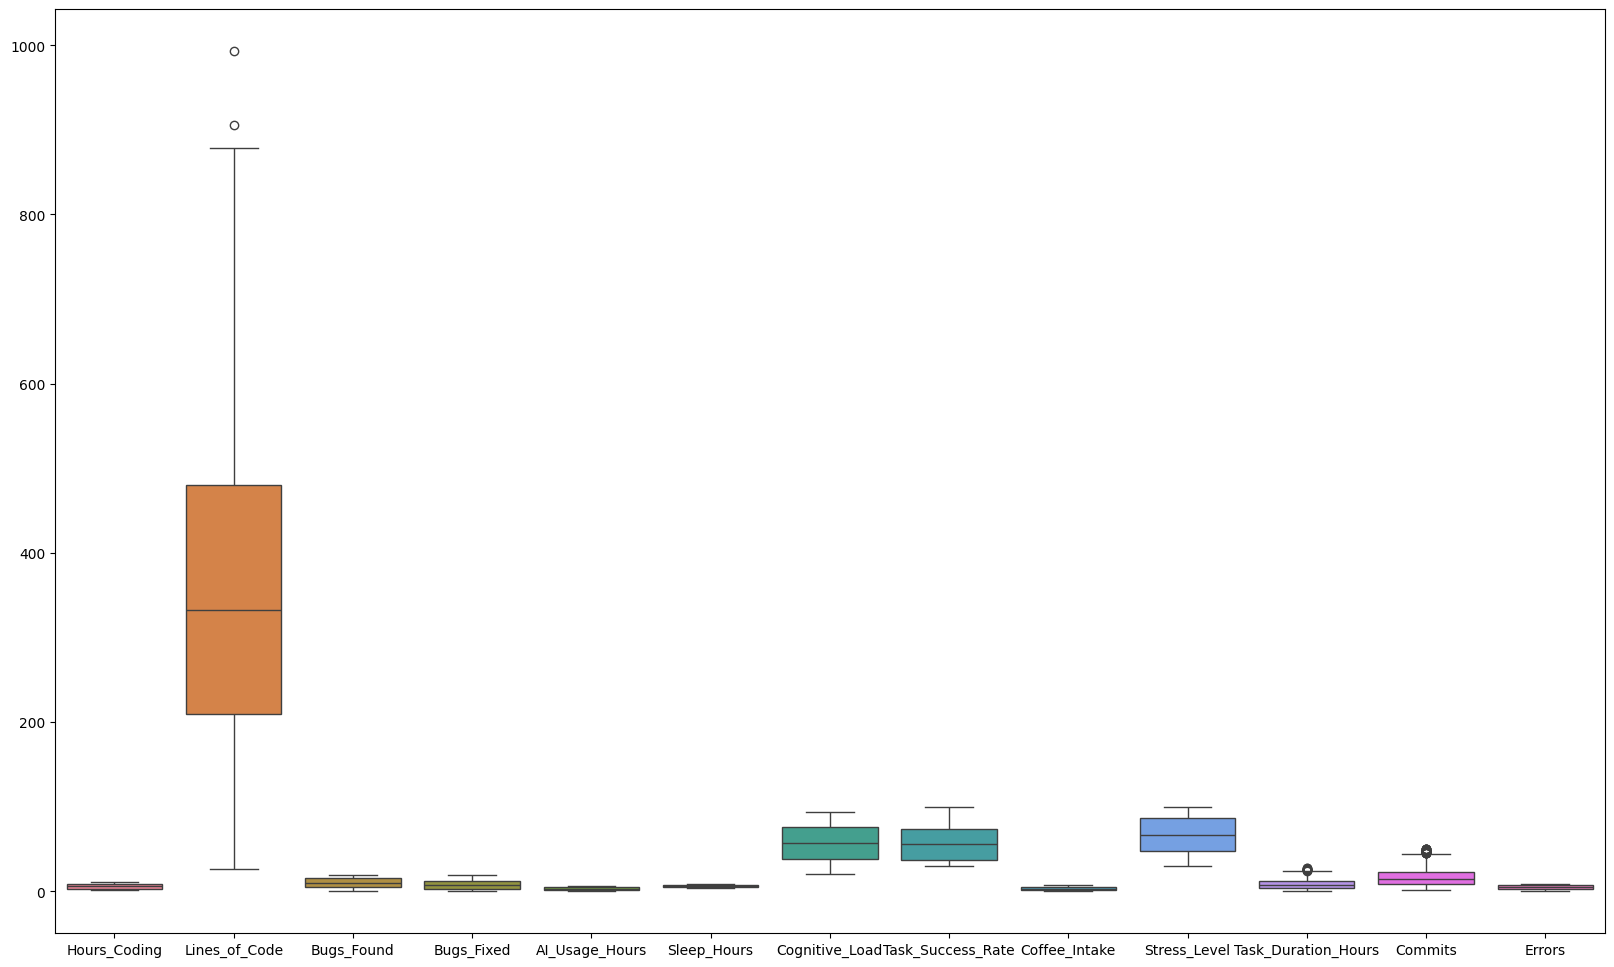

In [41]:
#Outlier 
plt.figure(figsize= (20,12))
sns.boxplot(df)
plt.show()

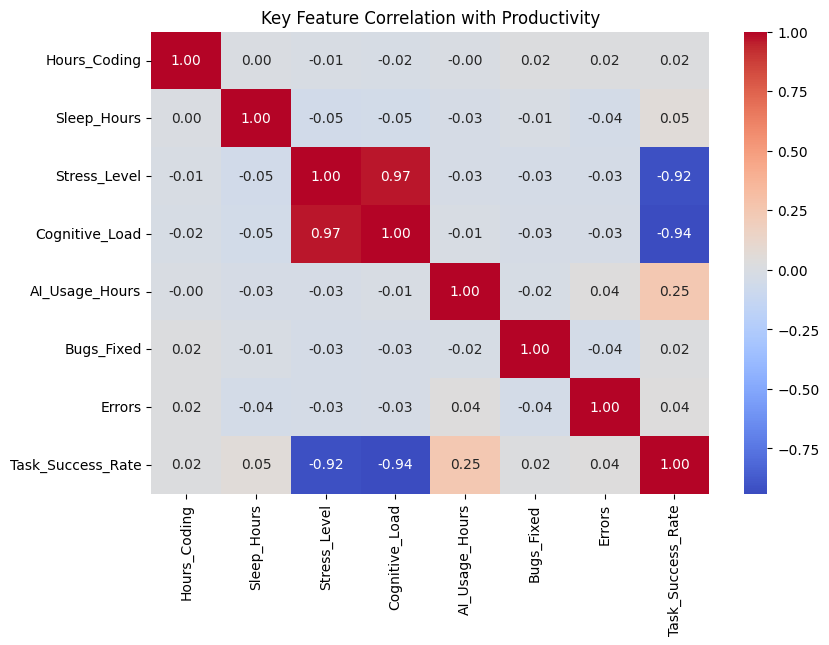

In [43]:
key_features = [
    'Hours_Coding',
    'Sleep_Hours',
    'Stress_Level',
    'Cognitive_Load',
    'AI_Usage_Hours',
    'Bugs_Fixed',
    'Errors',
    'Task_Success_Rate'
]

corr = df[key_features].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Key Feature Correlation with Productivity')
plt.show()



#### Insights
- Task Success rate is target column
- Data is slightly non-normal distributed (mean = median)
- There is no missing value and there is only 2% percent outlier in one column which is negligible 
- Stress and cognitive load are the strongest negative predictors of task success. Reducing stress and managing mental load could significantly improve developer performance.

- Using AI tools, fixing bugs, and committing code frequently are positively associated with success.

- Longer coding hours do not guarantee success — efficiency and work-life balance may be more important.

- Sleep has a negligible direct impact on success in this dataset, though it may indirectly affect stress and cognitive load.